In [48]:
#Loading the necessary libraries for NLP and web scraping
library(xml2)
library(rvest)
library(magrittr) # allows using %>% to pipe data
library(syuzhet)

[1] "San Jose State University - Powering Silicon Valley | San Jose State University (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){ (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o), m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m) })(window,document,'script','//www.google-analytics.com/analytics.js','ga'); ga('create', 'UA-21659030-2', 'auto'); ga('send', 'pageview'); var trackLinks = function(category,action,label) {    ga('send','event',category,action,label);    }       Skip to Main Content                            SJSU Homepage                  San José State UniversityPowering Silicon Valley                          .show-for-sr { position: absolute !important; width: 1px; height: 1px; padding: 0; overflow: hidden; clip: rect(0, 0, 0, 0); white-space: nowrap; -webkit-clip-path: inset(50%);     clip-path: inset(50%); border: 0; } Search SJSU Search                             Site Navigation      Discover SJSU About SJSUAcademicsAdministration and LeadershipAthleticsCalendars and EventsInitiatives and PartnershipsKing LibraryNewsResearchVisit SJSUFuture Students Spartan App PortalAcademicsAdmissionsCalendars and EventsFinancesHousing OptionsNew StudentsVisit SJSU Current Students Spartan App PortalAcademicsAdvisingCalendars and EventsCampus LifeDiversityFinancesGraduationHealth and WellnessKing LibraryNew StudentsSafetyTechnologyFaculty and Staff Spartan App PortalAcademicsCalendars and EventsCareersDirectoryDiversityHealth and WellnessKing LibraryResearchSafetyTechnologyAlumni and Community Alumni AssociationCareersDo Business with SJSUGive to SJSUHire SJSU TalentConnectVisit SJSU                                                               2019 U.S."
[2] "News Rankings: SJSU Fifth Overall                         \"These rankings confirm San Jose State is among Silicon Valley's most important assets,\" President Mary A. Papazian said."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] ".qi."                                                                                                                                                                                                                                                                                                                                                                                                                                                  

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.250   1.400   1.545   2.825   3.900 

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
1,2,0,0,2,0,0,5,3,9
0,0,0,0,0,0,0,2,0,3
0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,1,0,1,2,0
0,1,0,0,0,0,0,1,0,3


[1] "Mean of all the emotions combined at SJSU website is :  2.3"
[1] "Mean of emotion joy at SJSU website is :  0.7"


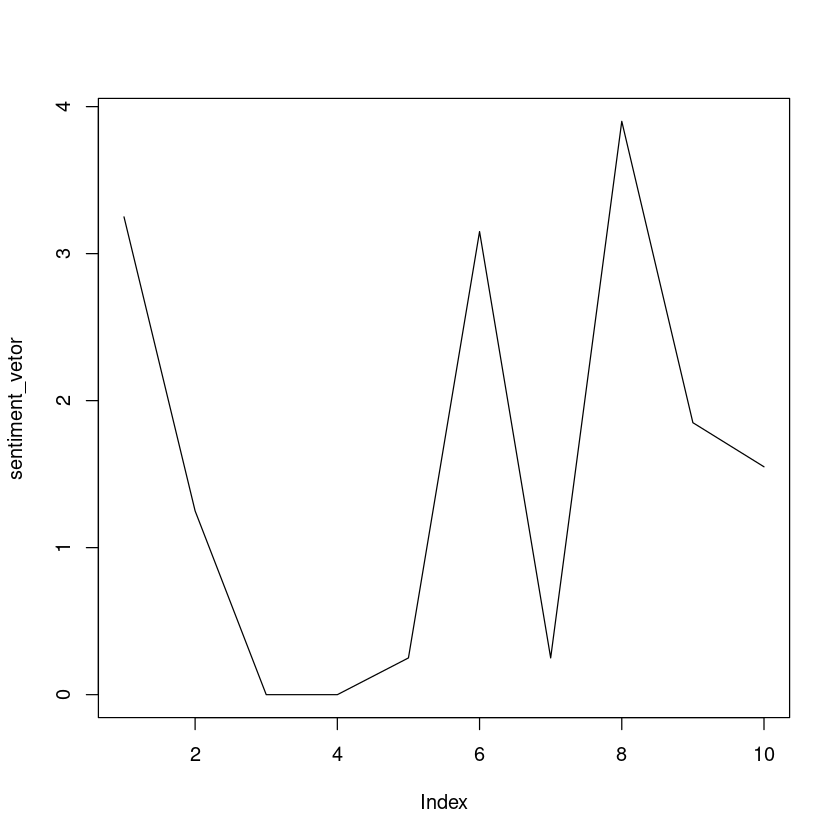

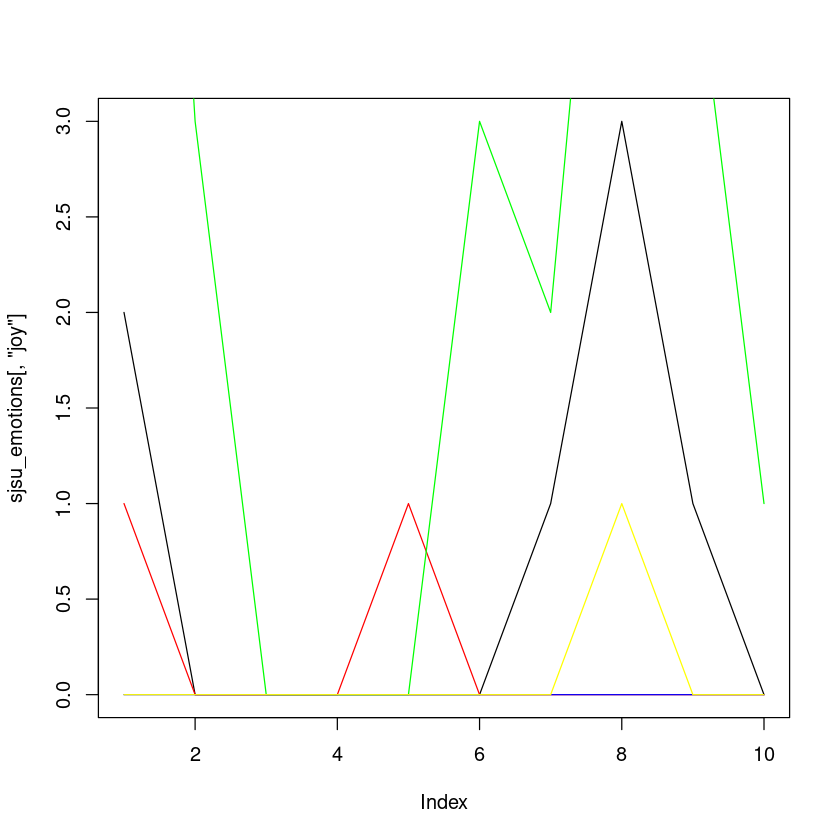

In [49]:
#Scraping data from sjsu's website
sjsu_url <- "http://www.sjsu.edu"

#Reading HTML content of the webpage
sjsu_page <- read_html(sjsu_url)

#Extracting text out of the html data
sjsu_text <- html_text(sjsu_page)

#Cleaning the data, removing unnecessary tabs, extra spaces and line breaks using gsub
sjsu_text <- gsub("\\n",'',sjsu_text)
sjsu_text <- gsub("\\t",' ',sjsu_text)
sjsu_text <- gsub("  ",' ',sjsu_text)

#Converting whole text into sentences.
sjsu_sentences<- get_sentences(sjsu_text)

#sample of the data
head(sjsu_sentences)

#Performing sentimental analysis using package syuzhet, to values based on degree of sentiments
sentiment_vetor <- get_sentiment(sjsu_sentences, method="syuzhet")

#Summary of sentimental_vector, mean, median, sd etc
summary(sentiment_vetor)

#plotting graph for sentiment values
plot(sentiment_vetor,type="l")

#Calculating the emotions in the sentences, categorized in 8 different emotions
sjsu_emotions<- get_nrc_sentiment(sjsu_sentences)
head(sjsu_emotions)

#Calculating the mean value of the emotions
print(paste("Mean of all the emotions combined at SJSU website is : ",mean(sjsu_emotions$positive-sjsu_emotions$negative)))
print(paste("Mean of emotion joy at SJSU website is : ",mean(sjsu_emotions[,"joy"])))

#plotting different emotions on the graph

plot(sjsu_emotions[,"joy"],type="l")
lines(sjsu_emotions[,"anger"],col="red")
lines(sjsu_emotions[,"positive"],col="green")
lines(sjsu_emotions[,"fear"],col="blue")
lines(sjsu_emotions[,"surprise"],col="yellow")

#Verdict  : The sjsu website content carries positive connotations mostly.


[1] "Stanford University.awesome-weather-wrap { font-family: 'Open Sans', sans-serif; font-weight: 400; font-size: 14px; line-height: 14px; }   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){    (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),   m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');  ga('create', 'UA-1860414-1', 'auto');  ga('send', 'pageview');  Skip to content  Stanford University   StudentsFaculty & StaffParentsVisitorsAlumniSearch   Menu    NewsEventsAcademicsResearchHealth CareCampus LifeAdmissionAbout           Search term       Search Stanford:    Web    People      Search       Other ways to search:    Map    Organizations    Profiles   StanfordExplore Stanford   Main Content  Stanford TodayThe latest news from Stanford       Social Sciences    Elections: Understanding democracy in a divided America        Social Sciences    How violent protest can backfire        Science & Technology    New simulation shows how Alzheimer's spreads        Arts & Creativity    Cantor, Stanford Libraries make Warhol photography archives publicly available        Science & Technology    Can digital incentives help alleviate traffic?"
[2] "In the Spotlight    By challenging assumptions, Stanford researchers make important discoveries  More Stanford News Stanford EventsWhat's happening on campus      Oct   13       sports   Volunteer Work Day with Stanford's Conservation Program   9:00 AM      Oct   13       exhibition   Andy Warhol: Photography Without End   through January 6, 2019      Oct   15       lecture   What Is the Matter with America's Schools?"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
[3] "12:30 PM      Oct   16       lecture   CISAC Drell Lecture: \"The Battle for the Soul of the Internet\"   4:30 PM  More Stanford Events AcademicsPreparing students to make meaningful contributions to society as engaged citizens and leaders in a complex worldUndergraduate EducationRich learning experiences that provide a broad liberal arts foundation and deep subject-area expertiseUndergraduate EducationGraduate EducationUnsurpassed opportunities to participate in the advancement of entire fields of knowledgeGraduate EducationLifelong learningContinuing adult education, executive and professional programs, and programs for K-12 studentsPrograms for Lifelong Learning Seven schools in which to pursue your passionsMedicineLawHumanities & SciencesEngineeringEducationEarthBusiness More About Academics   \"Our students' commitment to social justice moves me – they're what I love the most about Stanford.\""                                                                                                                                                                                                                                                                                                                                                                                                                       
[4] "Jisha Menon  Associa

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.225   2.850   3.583   4.750  11.950 

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
2,2,2,2,2,1,2,3,3,8
0,2,0,1,1,0,0,3,0,3
1,1,0,0,2,0,0,4,3,9
1,0,0,1,0,1,1,4,1,7
0,0,0,0,0,0,1,1,1,4
1,1,0,1,0,1,1,1,1,2


[1] "Mean of all the emotions combined at stanford website is :  3.66666666666667"
[1] "Mean of emotion joy at stanford website is :  1.13333333333333"


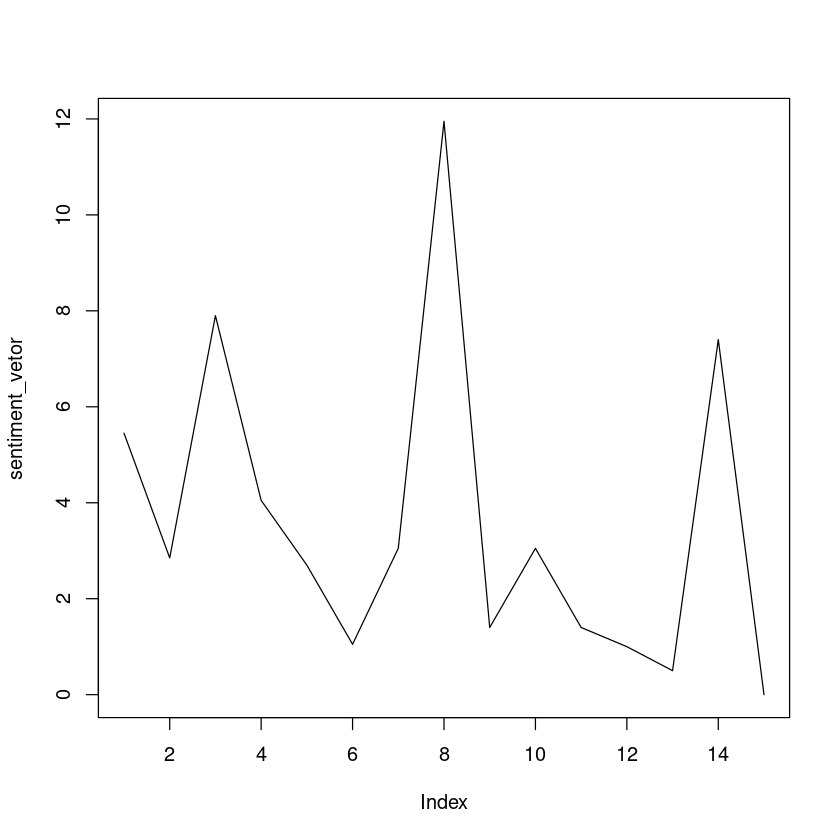

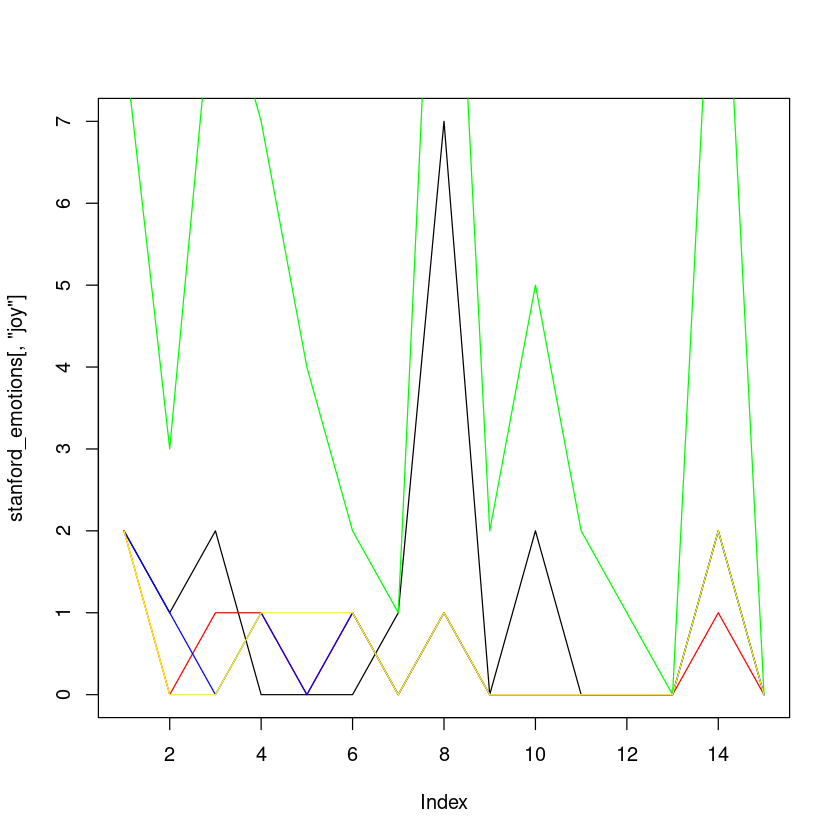

In [50]:
#Scraping data from stanford's website
stanford_url <- "http://www.stanford.edu"

#Reading HTML content of the webpage
stanford_page <- read_html(stanford_url)

#Extracting text out of the html data
stanford_text <- html_text(stanford_page)

#Cleaning the data, removing unnecessary tabs, extra spaces and line breaks using gsub
stanford_text <- gsub("\\n",'',stanford_text)
stanford_text <- gsub("\\t",' ',stanford_text)
stanford_text <- gsub("  ",' ',stanford_text)

#Converting whole text into sentences.
stanford_sentences<- get_sentences(stanford_text)

#sample of the data
head(stanford_sentences)

#Performing sentimental analysis using package syuzhet, to values based on degree of sentiments
sentiment_vetor <- get_sentiment(stanford_sentences, method="syuzhet")

#Summary of sentimental_vector, mean, median, sd etc
summary(sentiment_vetor)

#plotting graph for sentiment values
plot(sentiment_vetor,type="l")

#Calculating the emotions in the sentences, categorized in 8 different emotions
stanford_emotions<- get_nrc_sentiment(stanford_sentences)
head(stanford_emotions)

#Calculating the mean value of the emotions
print(paste("Mean of all the emotions combined at stanford website is : ",mean(stanford_emotions$positive-stanford_emotions$negative)))
print(paste("Mean of emotion joy at stanford website is : ",mean(stanford_emotions[,"joy"])))

#plotting different emotions on the graph

plot(stanford_emotions[,"joy"],type="l")
lines(stanford_emotions[,"anger"],col="red")
lines(stanford_emotions[,"positive"],col="green")
lines(stanford_emotions[,"fear"],col="blue")
lines(stanford_emotions[,"surprise"],col="yellow")

#Verdict  : The stanford website content also carries positive connotations mostly.


On the basis of sentimental analysis between the websites, it seem stanford's website has more positive sentiments than sjsu.